In [4]:
import pandas as pd
from matplotlib import pyplot as plt

train_data = pd.read_csv("train.csv")

Number of missing values:
keyword       61
location    2533
dtype: int64

Percentage of missing values:
keyword      0.801261
location    33.272035
dtype: float64


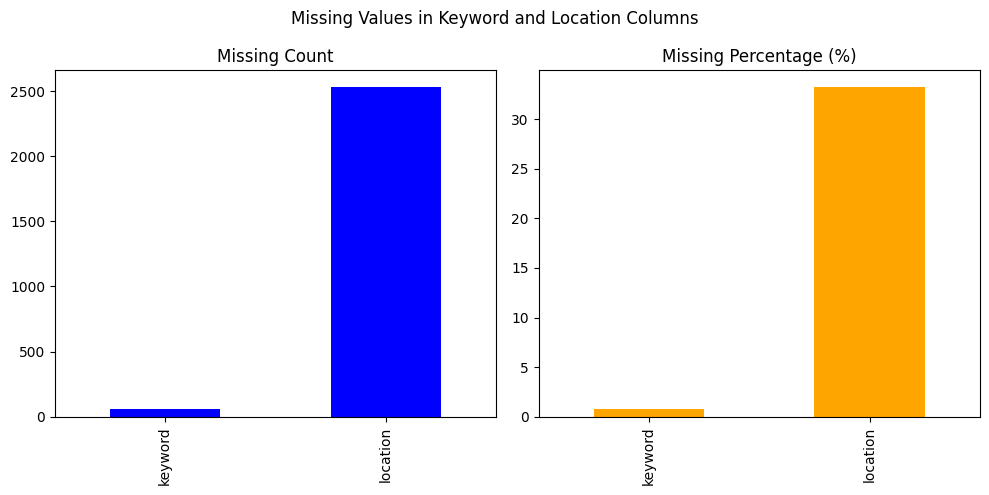

In [5]:
# Check for missing values in the 'keyword' and 'location' columns
missing_values = train_data[['keyword', 'location']].isnull().sum()

# Calculate percentage of missing values
total_rows = len(train_data)
missing_percentage = (missing_values / total_rows) * 100

# Print number and percentage of missing values
print("Number of missing values:")
print(missing_values)
print("\nPercentage of missing values:")
print(missing_percentage)

# Combine count and percentage into a DataFrame for visualization
missing_data = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage
})

# Plot the histogram
missing_data.plot(kind='bar', color=['blue', 'orange'], subplots=True, layout=(1, 2), figsize=(10, 5), legend=False)
plt.suptitle('Missing Values in Keyword and Location Columns')
plt.tight_layout()
plt.show()

Counts of 0 and 1 in the 'target' column:
target
0    4342
1    3271
Name: count, dtype: int64

Percentage of 0 and 1 in the 'target' column:
target
0    57.034021
1    42.965979
Name: count, dtype: float64


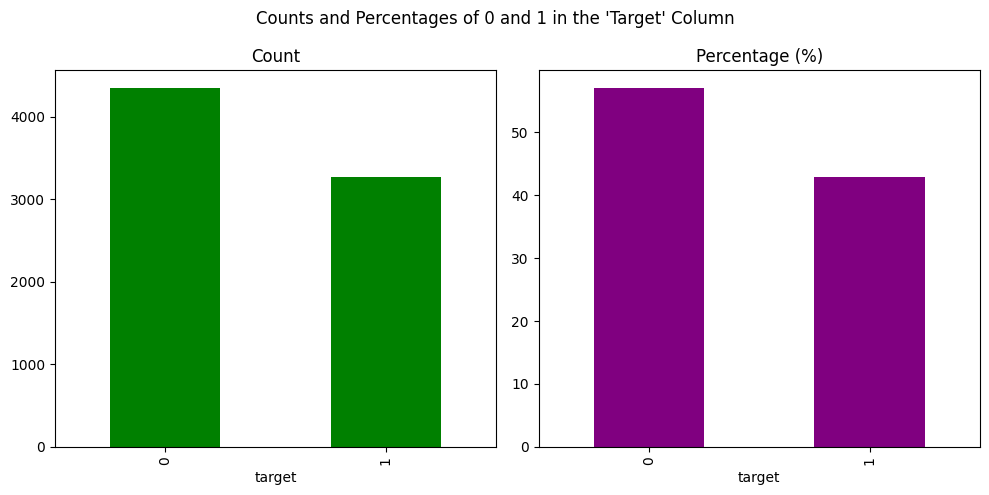

In [6]:
# Count occurrences of 0s and 1s in the 'target' column
target_counts = train_data['target'].value_counts()

# Calculate percentage of 0s and 1s
target_percentage = (target_counts / len(train_data)) * 100

# Print counts and percentages
print("Counts of 0 and 1 in the 'target' column:")
print(target_counts)
print("\nPercentage of 0 and 1 in the 'target' column:")
print(target_percentage)

# Create a DataFrame for visualization
target_data = pd.DataFrame({
    'Count': target_counts,
    'Percentage (%)': target_percentage
})

# Plot the histogram for counts and percentages
target_data.plot(kind='bar', color=['green', 'purple'], subplots=True, layout=(1, 2), figsize=(10, 5), legend=False)
plt.suptitle("Counts and Percentages of 0 and 1 in the 'Target' Column")
plt.tight_layout()
plt.show()

Number of Tweets: 7613
Average Tweet Length: 101.03743596479706
Average Word Count: 14.903585971364771


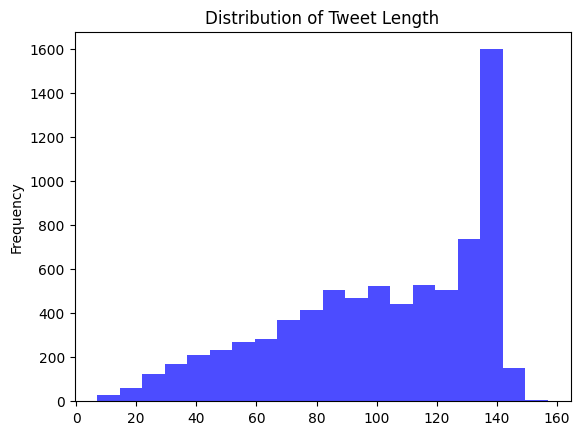

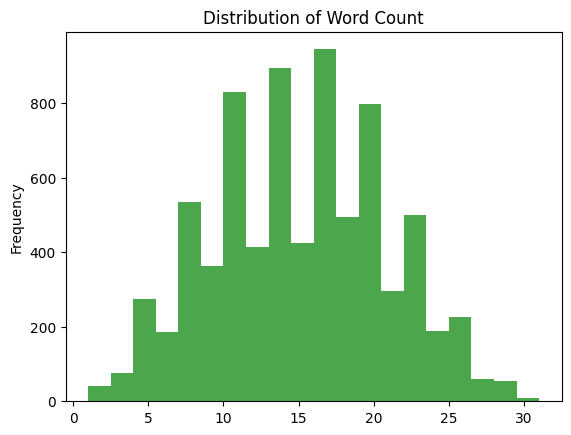

In [7]:
# Basic Text Statistics

# Number of tweets
num_tweets = len(train_data['text'])

# Length of each tweet
train_data['tweet_length'] = train_data['text'].apply(len)

# Word count in each tweet
train_data['word_count'] = train_data['text'].apply(lambda x: len(x.split()))

# Summary statistics
print("Number of Tweets:", num_tweets)
print("Average Tweet Length:", train_data['tweet_length'].mean())
print("Average Word Count:", train_data['word_count'].mean())

# Plot tweet length and word count distribution
train_data['tweet_length'].plot(kind='hist', bins=20, color='blue', alpha=0.7, title='Distribution of Tweet Length')
plt.show()

train_data['word_count'].plot(kind='hist', bins=20, color='green', alpha=0.7, title='Distribution of Word Count')
plt.show()

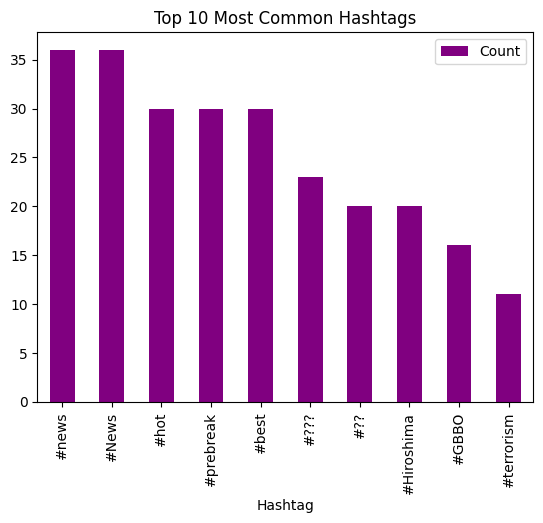

In [8]:
from collections import Counter

# Extract hashtags from the statuses
train_data['hashtags'] = train_data['text'].apply(lambda x: [word for word in x.split() if word.startswith('#')])

# Flatten the list of hashtags
all_hashtags = [hashtag for hashtags in train_data['hashtags'] for hashtag in hashtags]

# Count hashtag frequency
hashtag_freq = Counter(all_hashtags)

# Plot the top 10 most frequent hashtags
common_hashtags = pd.DataFrame(hashtag_freq.most_common(10), columns=['Hashtag', 'Count'])
common_hashtags.plot(kind='bar', x='Hashtag', y='Count', color='purple', title='Top 10 Most Common Hashtags')
plt.show()

In [9]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lenocka/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

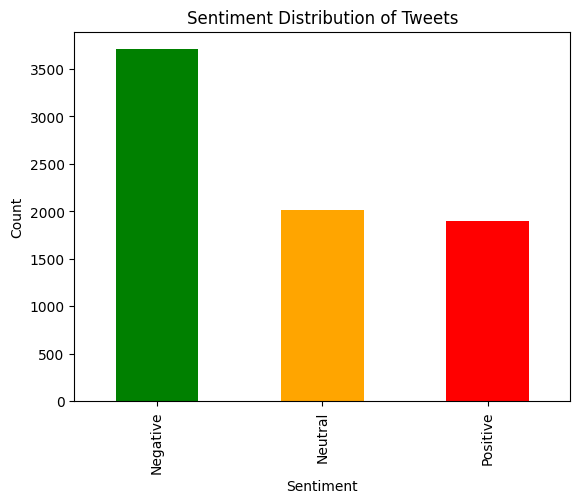

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment using VADER
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment function to each tweet in the 'text' column
train_data['sentiment'] = train_data['text'].apply(get_sentiment)

# Plot the sentiment distribution
train_data['sentiment'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

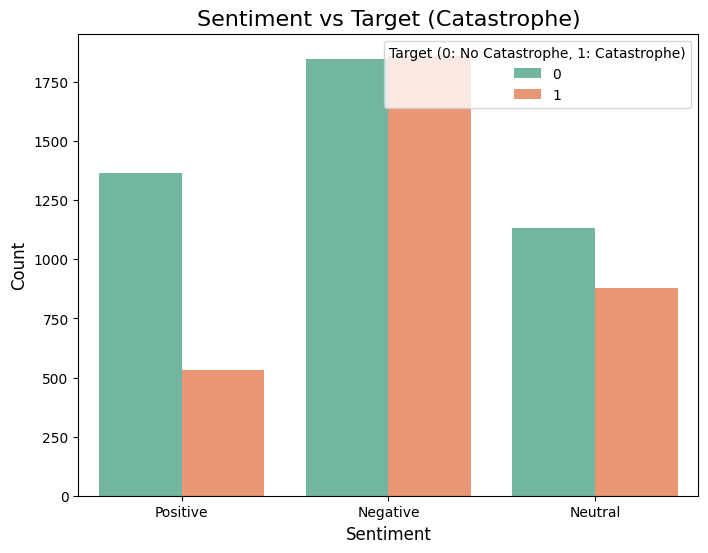

In [11]:
import seaborn as sns

# Create a count plot to visualize the relationship between sentiment and target
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', hue='target', data=train_data, palette='Set2')

# Add title and labels
plt.title('Sentiment vs Target (Catastrophe)', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Target (0: No Catastrophe, 1: Catastrophe)', loc='upper right')

plt.show()